# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_6367/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

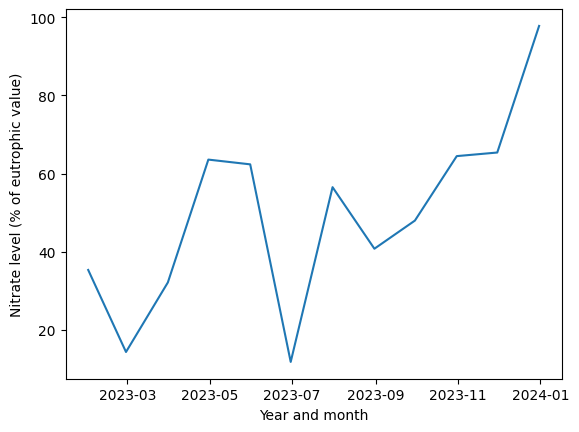

In [16]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_6367/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

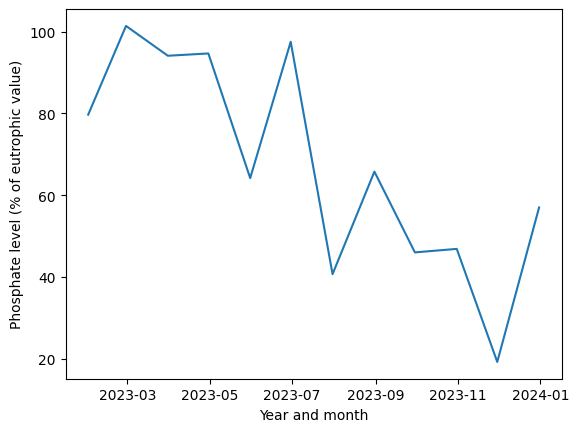

In [17]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

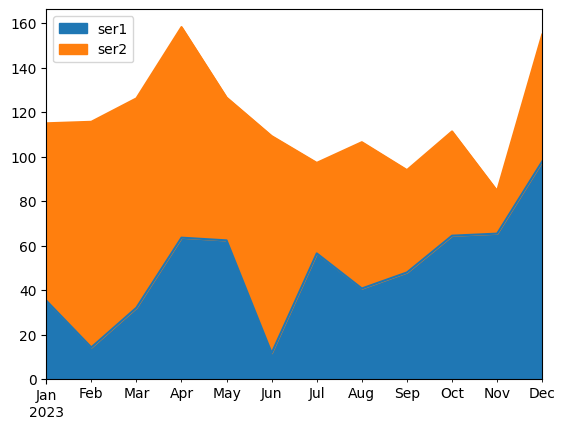

In [18]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

##### Load Dataset:

In [20]:
train_cc = pd.read_csv('customer_churn_dataset-training-master.csv')
test_cc = pd.read_csv('customer_churn_dataset-testing-master.csv')

##### The dataset is split into training and testing sets. I combined the two to do analysis on the whole dataset:

In [22]:
customer_churn = pd.concat([train_cc, test_cc], ignore_index=True)
customer_churn.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


##### To find correlations between the numeric features, I used a correlation matrix:

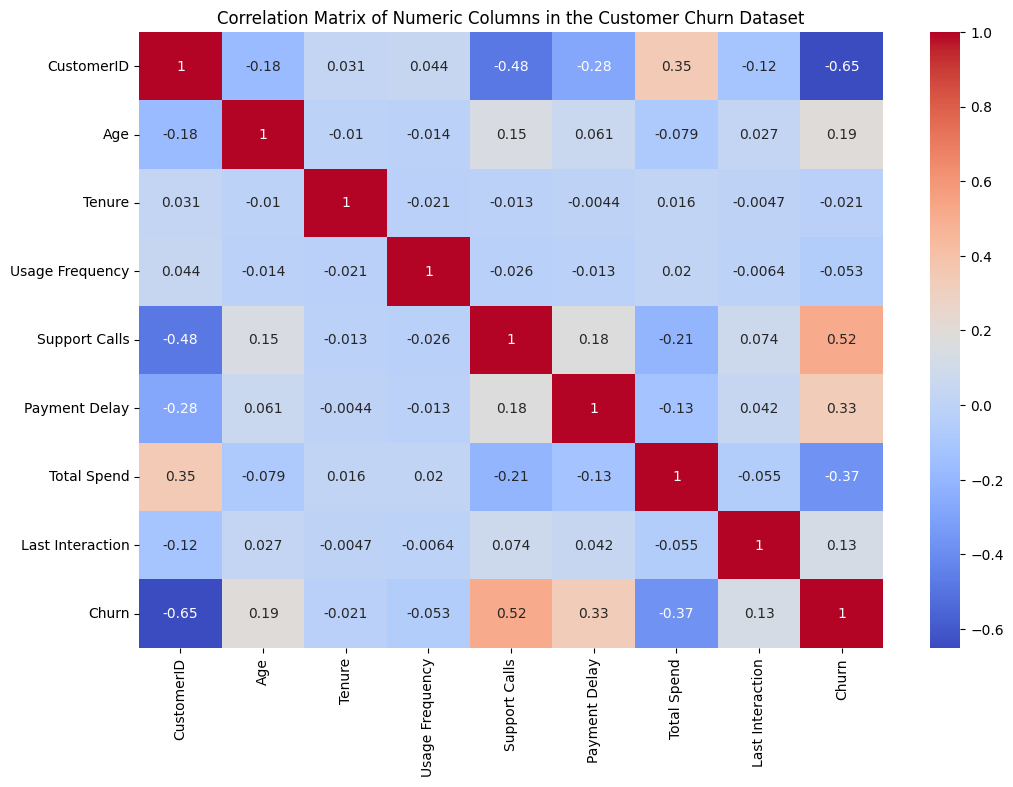

In [23]:
plt.figure(figsize=(12, 8))
correlation = customer_churn.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns in the Customer Churn Dataset')
plt.show()

Upon viewing this correlation matrix, I noted an unusually strong relationship between Churn and Customer ID. CustomerID serves as an identifier and should not correlate with anything meaningful. This could indicate that CustomerIDs were issued sequentially in a way that correlated with churn. For this reason, I will be ignoring CustomerID in the analysis.

There is a strong correlation between Churn and Support Calls. This tells us that customers who churn tend to call support more.

There is also correlation between Churn and Payment Delay. Delayed payments may be a warning sign.

There is also correlation between Churn and Total spend. This tells us that those who spend more are less likely to churn.

##### Next, I created boxplots for the features that were strongly correlated with churn. Since churn is categorical, boxplots will better display the relationship between churn and the chosen feature. 

##### Support Calls vs. Churn:

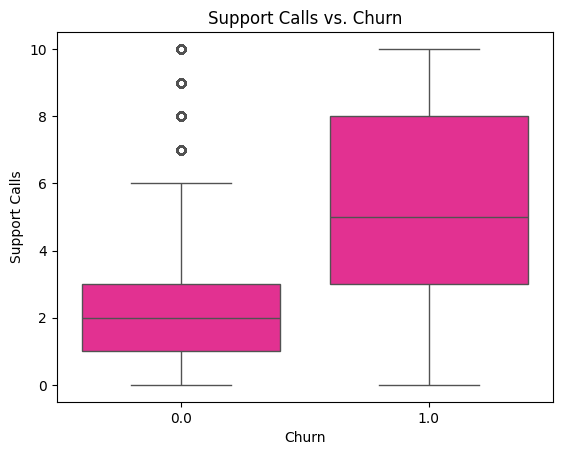

In [27]:
sns.boxplot(data=customer_churn, x='Churn', y='Support Calls', color='deeppink')
plt.title('Support Calls vs. Churn')
plt.show()

##### Payment Delay vs. Churn:

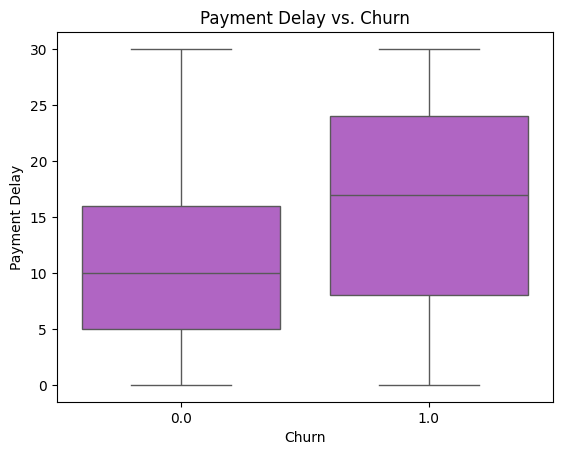

In [29]:
sns.boxplot(data=customer_churn, x='Churn', y='Payment Delay', color='mediumorchid')
plt.title('Payment Delay vs. Churn')
plt.show()

##### Total Spend vs. Churn:

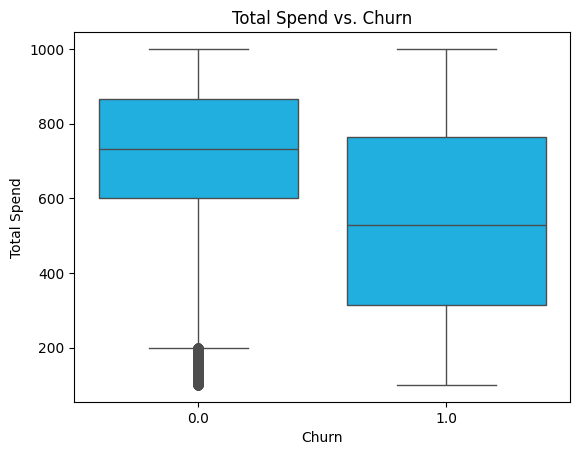

In [31]:
sns.boxplot(data=customer_churn, x='Churn', y='Total Spend', color='deepskyblue')
plt.title('Total Spend vs. Churn')
plt.show()

##### Next, I drew pairplots:
I chose to include the following columns:
* 'Support Calls': Has a strong positive correlation with 'Churn'.
* 'Payment Delay': Correlated with 'Churn' and 'Support Calls'.
* 'Total Spend': Has a negative correlation with 'Churn'.
* 'Tenure': Indicates whether customer is loyal vs. new. Relevant to churn analysis.
* 'Age': Had a weak correlation with 'Churn' but adds demographic conetext

In [32]:
customer_churn.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

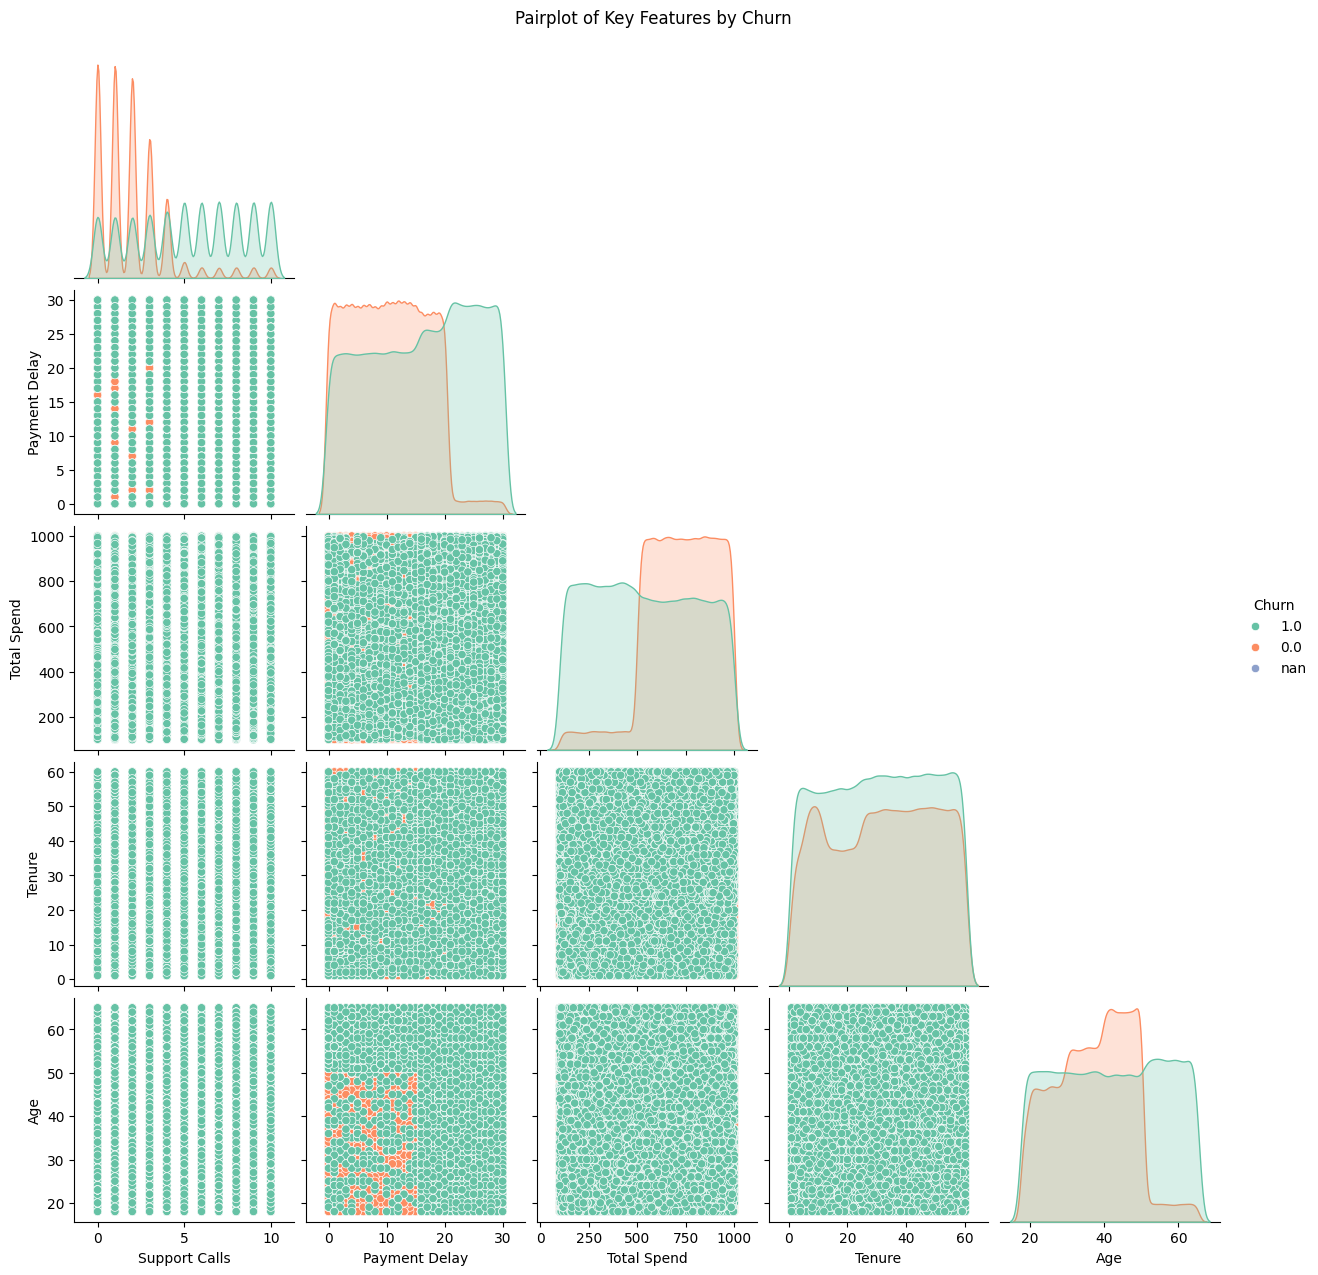

In [33]:
cols = ['Support Calls', 'Payment Delay', 'Total Spend', 'Tenure', 'Age']
customer_churn['Churn'] = customer_churn['Churn'].astype(str) #ensure that 'Churn' is categorical
#plot
sns.pairplot(customer_churn[cols+['Churn']], hue='Churn', diag_kind='kde', corner=True, palette='Set2')
plt.suptitle('Pairplot of Key Features by Churn', y=1.02)
plt.show()

#### Conclusions:

Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!
* ...

Do you see any outliers?  (Data points that are far from the rest of the data).
* ...

Are any data items highly correlated with each other, suggesting that they are redundant?
* ...

Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)
* ...

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

##### I decided to recreate a bar graph, similar to in Figure 3.16, where contrast was used to strategically highlight a certain feature (in their case, the performance of their business). 

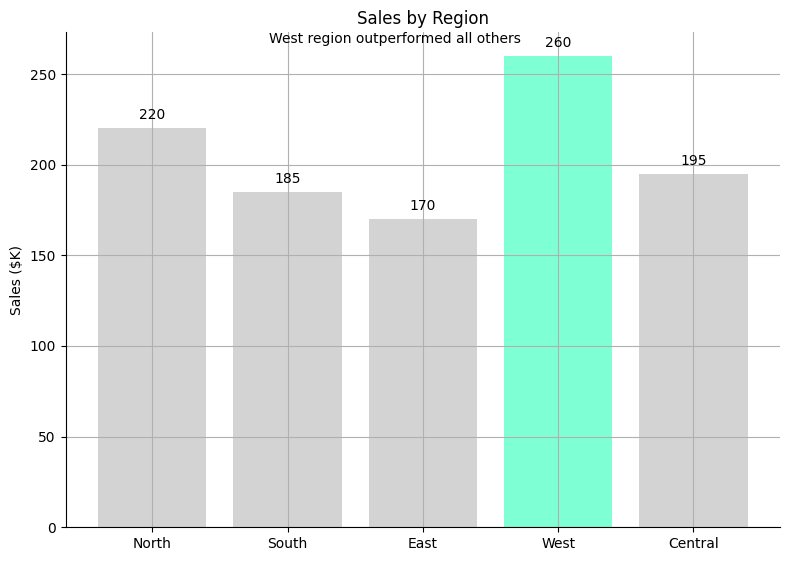

In [13]:
#sales by region (mock data)
regions = ["North", "South", "East", "West", "Central"]
sales = [220, 185, 170, 260, 195]
hightlight_index = 3 #highlights west region
#set bar colors for highlighted vs non highlighted
colors = ['lightgray'] * len(sales)
colors[hightlight_index] = 'aquamarine'
#plot
plt.figure(figsize=(8, 6))

bars = plt.bar(regions, sales, color=colors)
#add labels above bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+5, f"{sales[i]}", ha='center', fontsize=10)
plt.title("Sales by Region")
plt.suptitle("West region outperformed all others", fontsize=10, y=0.89)
plt.ylabel("Sales ($K)")
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()